<a href="https://colab.research.google.com/github/mvidales775/Project-2/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##First choice: Cirrhosis Prediction Dataset

1. Source of data
  - https://www.kaggle.com/datasets/fedesoriano/cirrhosis-prediction-dataset

2. Brief descrip
  - contains dataset of 418 cases that met eligibility criteria for the randomized placebo-controlled trial of the drug D-penicillamine over a ten year period.

3. What is the target?
  - Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)

4. What does one row represent? (A person? A business? An event? A product?)
  - Each row repreesents a person

5. Is this a classification or regression problem?
  - Classification, trying to determine if a person recived either D-penicillamine or placebo

6. How many features does the data have?
  - There are 18 features

7. How many rows are in the dataset?
  - There are 418 rows

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?
  - This dataset has a few features with missing values including the the target which could lead to a low outcome for the model.

##Second choice: Adult income dataset

1. Source of data
  - https://www.kaggle.com/datasets/wenruliu/adult-income-dataset

2. Brief description of data


3. What is the target?
  - two income groups: <=50K and >50K

4. What does one row represent? (A person? A business? An event? A product?)
  - Each row is a person

5. Is this a classification or regression problem?
  - since there are two income groups it is a classification problem

6. How many features does the data have?
  - there are 13 features

7. How many rows are in the dataset?
  - there are 48842 rows

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?
  - This dataset has alot of data with no null values, i do not see any problems at the moment.

# Cirrhosis Data Part 2

- Deleted unnecessary columns.
- Deleted duplicate rows.
- Identified and addressed missing values.
- Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).
- Produced univariate visuals for the target and all features.
Identified outliers.
- Clearly commented all of your cleaning steps and described any decisions you made.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
fpath = "/content/drive/MyDrive/CodingDojo/Project 2/cirrhosis.csv"

df = pd.read_csv(fpath, index_col=0)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 1 to 418
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage     

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [ ]:
string_cols = df.select_dtypes("object").columns
string_cols

Index(['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object')

In [ ]:
num_cols = df.select_dtypes("number").columns
num_cols

Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

In [ ]:
df.duplicated().sum()

0

No duplicate rows were found

In [ ]:
null_sums = df.isna().sum()
null_percent = null_sums/len(df) * 100
null_percent[null_percent>0]

Drug             25.358852
Ascites          25.358852
Hepatomegaly     25.358852
Spiders          25.358852
Cholesterol      32.057416
Copper           25.837321
Alk_Phos         25.358852
SGOT             25.358852
Tryglicerides    32.535885
Platelets         2.631579
Prothrombin       0.478469
Stage             1.435407
dtype: float64

There is about a qurater missing from multilple features including the target.

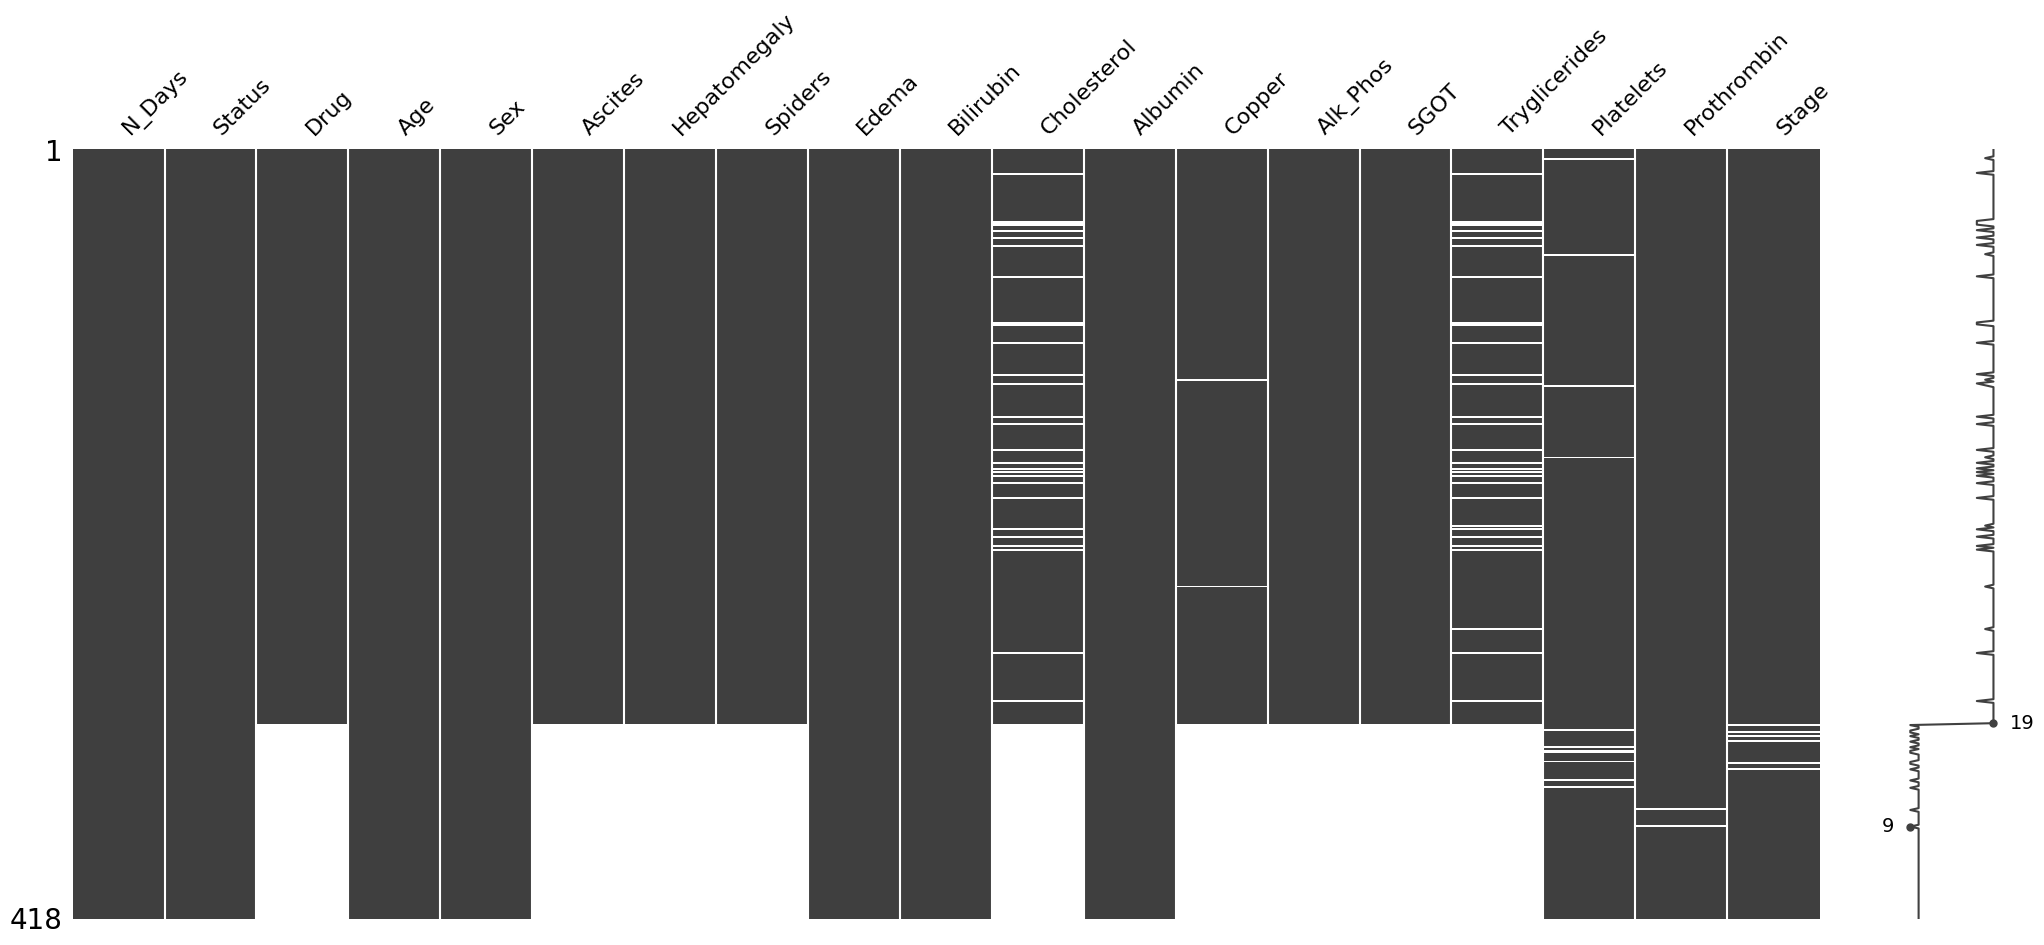

In [ ]:
msno.matrix(df);

Using the msno visual we see that the majority of missing data is grouped together so dropping the rows with missing 'drug' data will be helpful

In [ ]:
df = df.dropna(subset=["Drug"])

In [ ]:
null_sums = df.isna().sum()
null_percent = null_sums/len(df) * 100
null_percent[null_percent>0]

Cholesterol      8.974359
Copper           0.641026
Tryglicerides    9.615385
Platelets        1.282051
dtype: float64

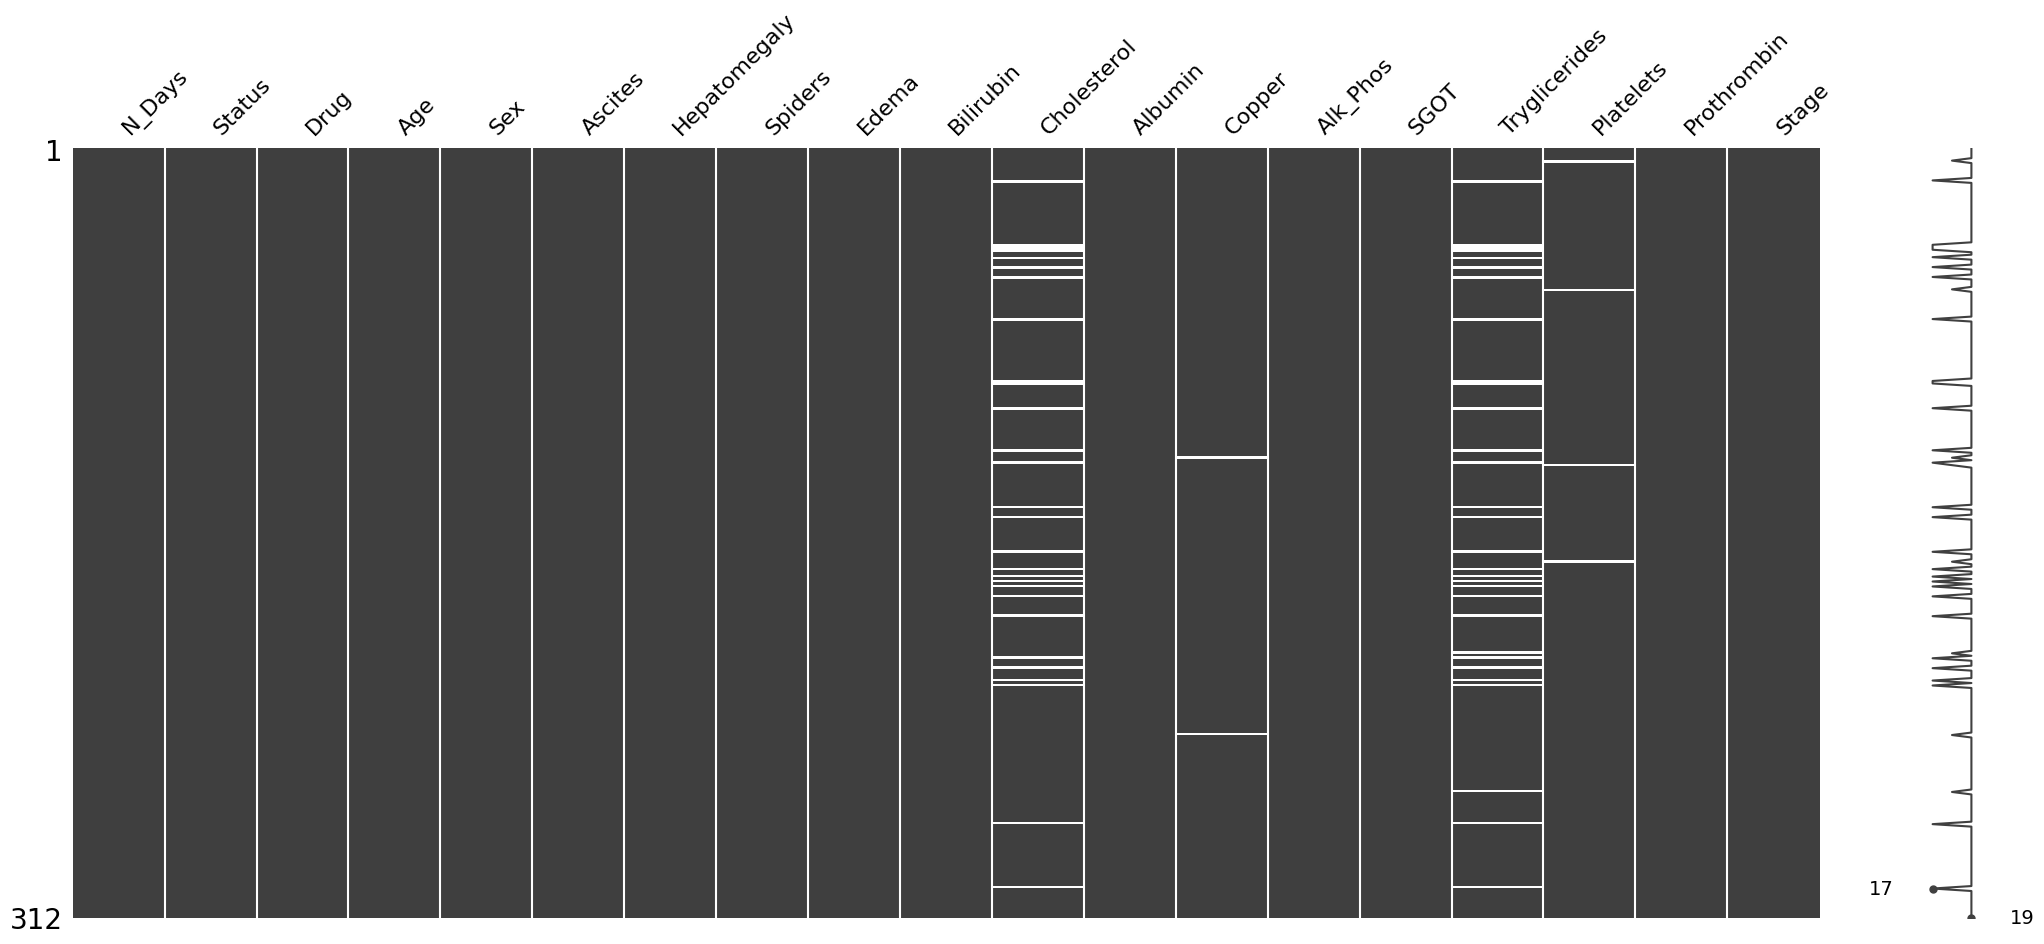

In [ ]:
msno.matrix(df);

In [ ]:
for col in string_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  print('\n')

Value Counts for Status
C     168
D     125
CL     19
Name: Status, dtype: int64


Value Counts for Drug
D-penicillamine    158
Placebo            154
Name: Drug, dtype: int64


Value Counts for Sex
F    276
M     36
Name: Sex, dtype: int64


Value Counts for Ascites
N    288
Y     24
Name: Ascites, dtype: int64


Value Counts for Hepatomegaly
Y    160
N    152
Name: Hepatomegaly, dtype: int64


Value Counts for Spiders
N    222
Y     90
Name: Spiders, dtype: int64


Value Counts for Edema
N    263
S     29
Y     20
Name: Edema, dtype: int64




All the data for the catagorical features are consistant

Num

In [ ]:
def plot_numeric(df,col):
  """EDA function to plot a histogram and boxplot for the selected column"""
  ## make the figure and axes sharing the same x-axis
  fig, axes = plt.subplots(nrows=2, figsize=(10,5), sharex=True)

  ## Use seaborn plots with ax=axes[i]
  sns.histplot(data=df,x = col,ax = axes[0])
  mean_value = df[col].mean();

  sns.boxplot(data=df, x = col, ax = axes[1])

  ## Updating title of top graph
  axes[0].set_title(f'EDA for {col}')

  ## Fixing any overlapping labels and showing
  plt.tight_layout()
  plt.show()

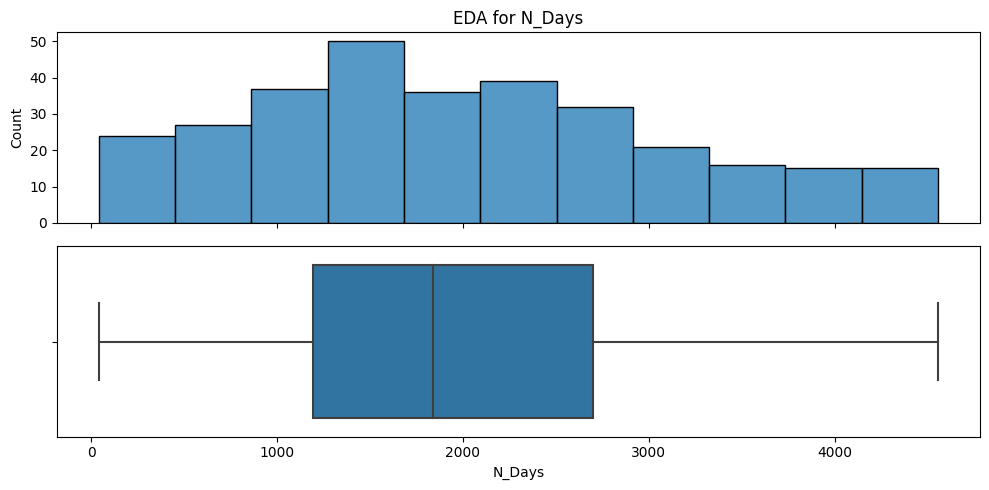

In [ ]:
plot_numeric(df,'N_Days')

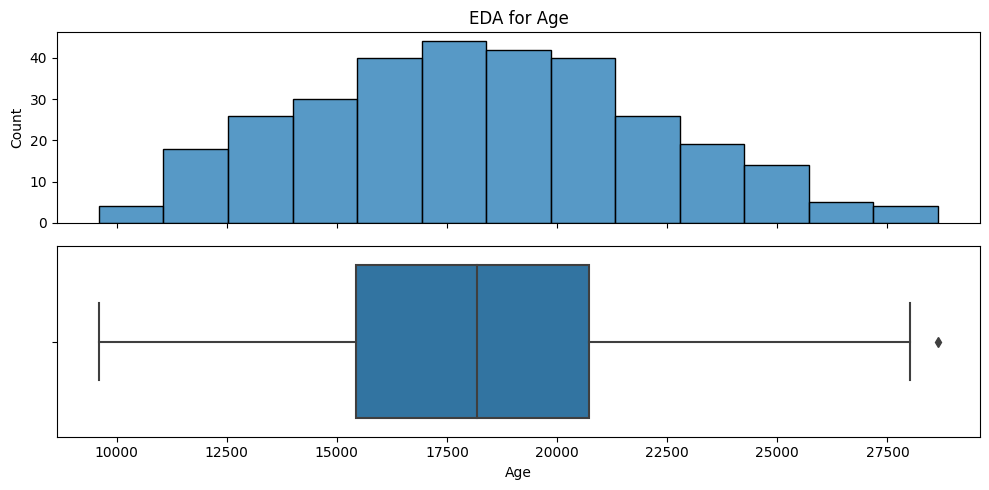

In [ ]:
plot_numeric(df,'Age')

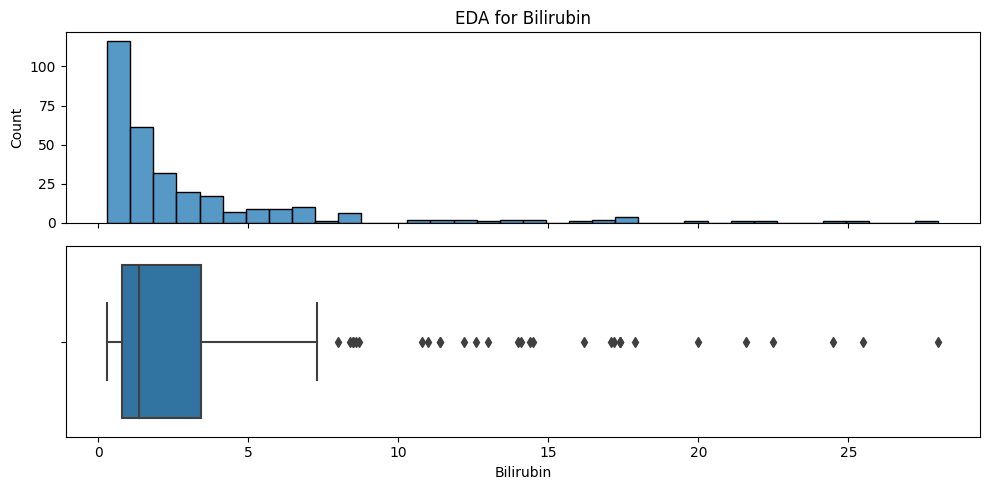

In [ ]:
plot_numeric(df,'Bilirubin')

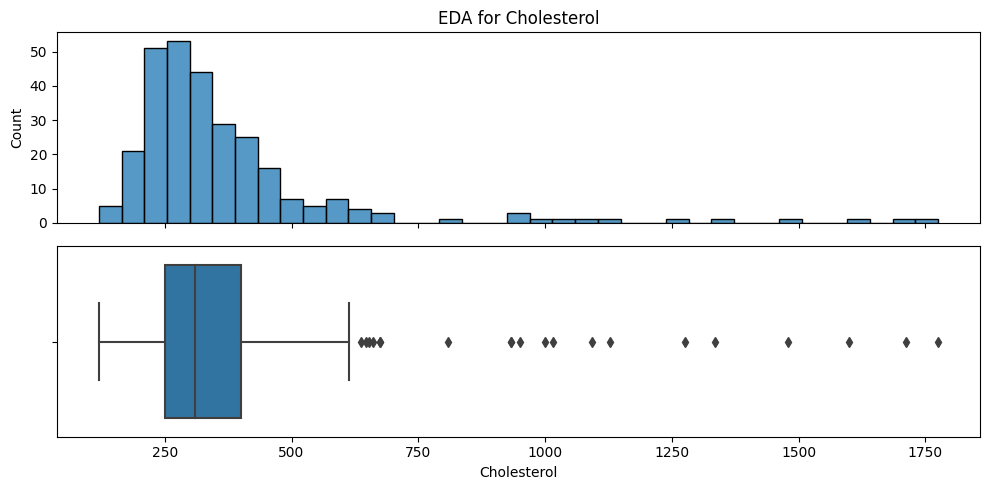

In [ ]:
plot_numeric(df,'Cholesterol')

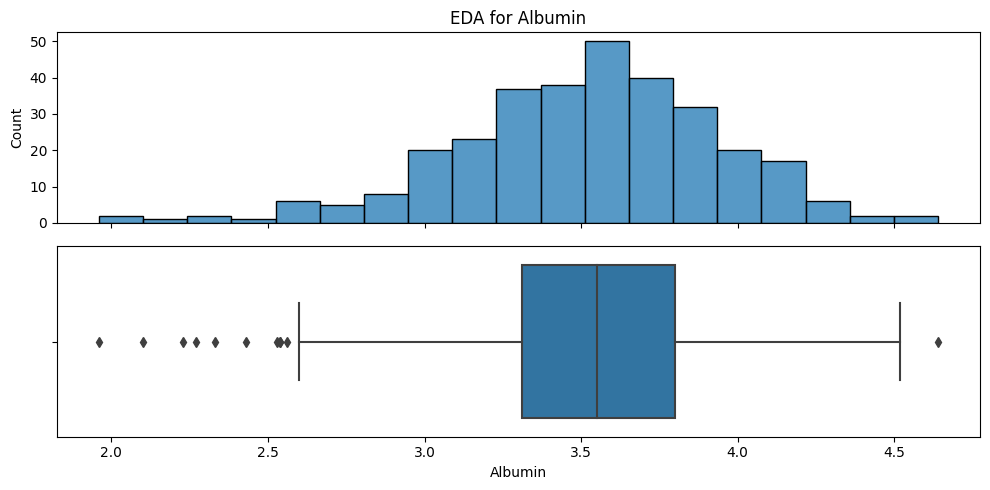

In [ ]:
plot_numeric(df,'Albumin')

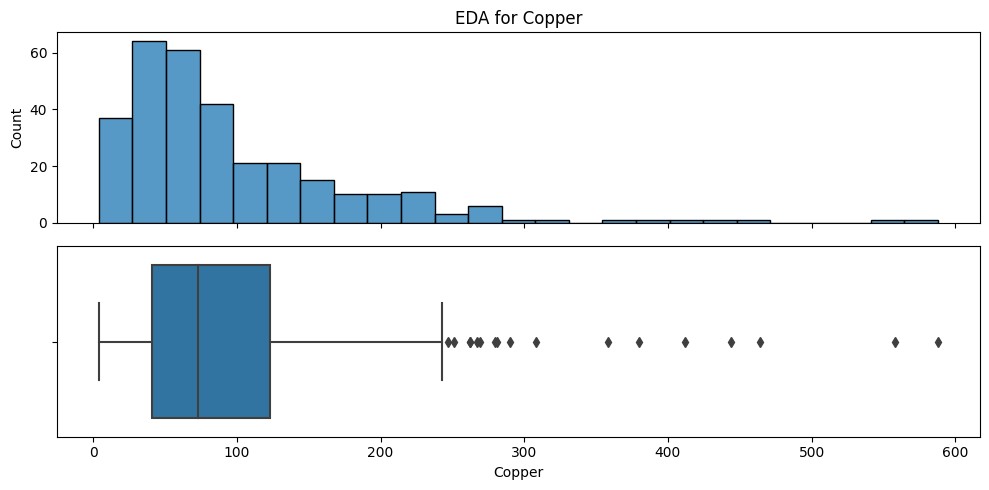

In [ ]:
plot_numeric(df,'Copper')

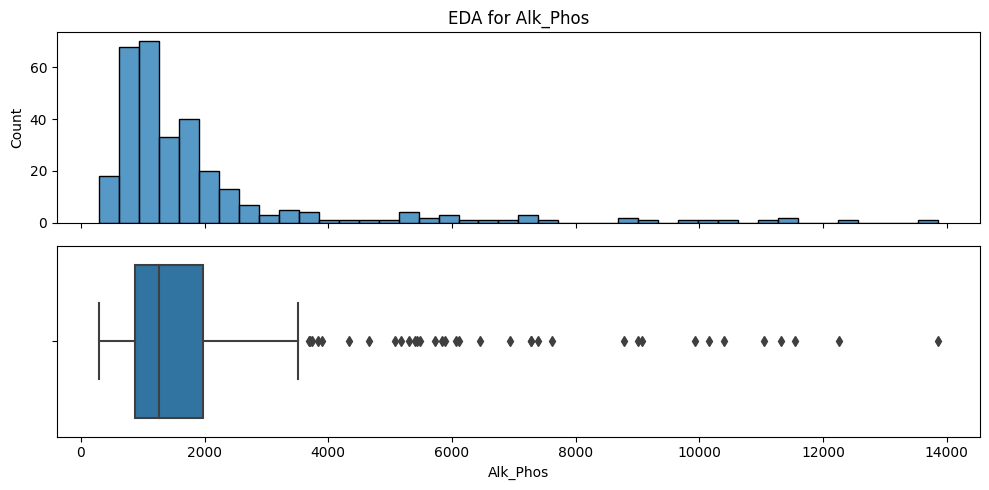

In [ ]:
plot_numeric(df,'Alk_Phos')

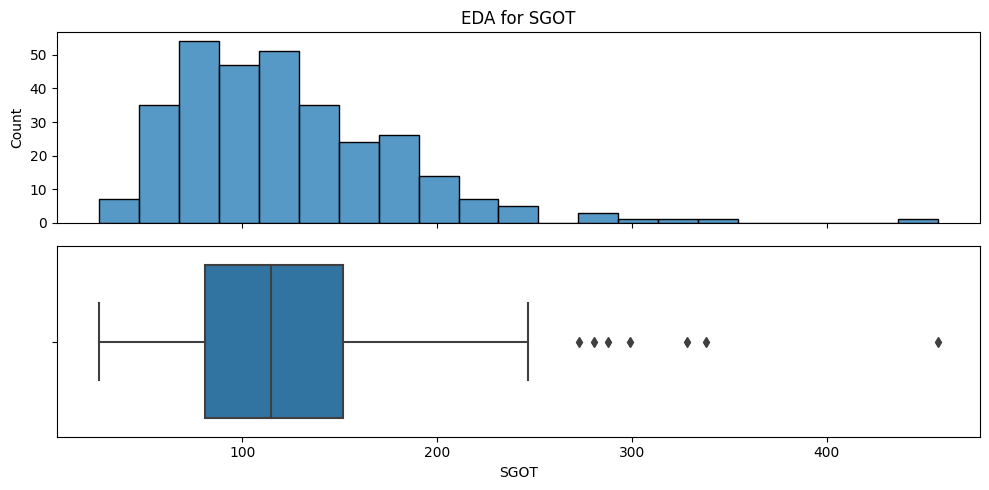

In [ ]:
plot_numeric(df,'SGOT')

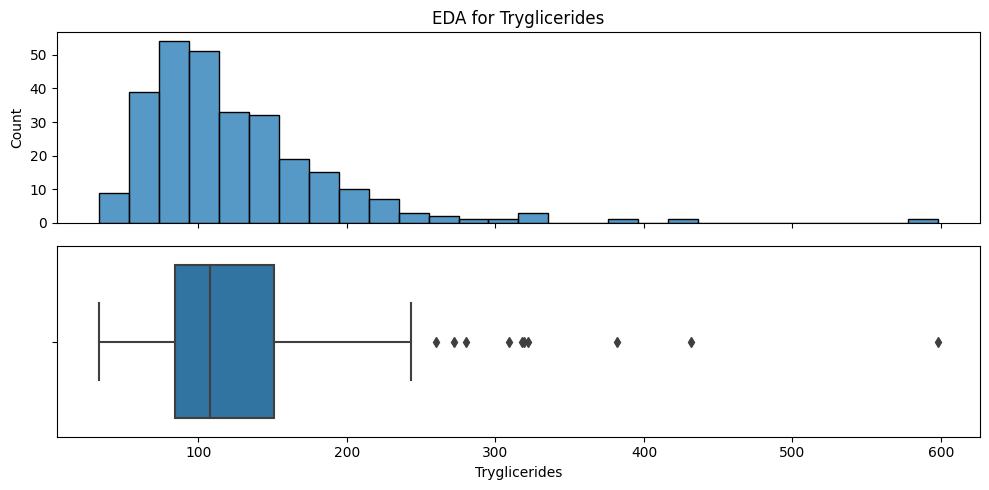

In [ ]:
plot_numeric(df,'Tryglicerides')

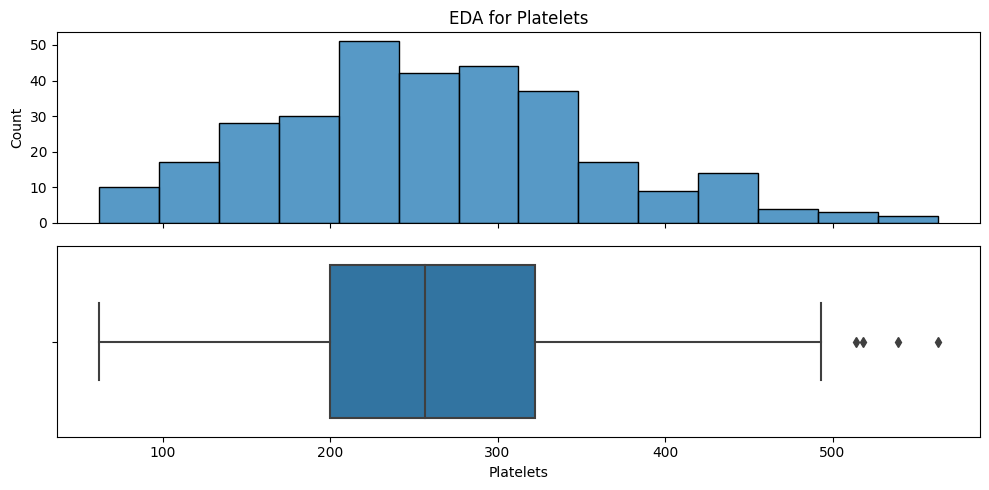

In [ ]:
plot_numeric(df,'Platelets')

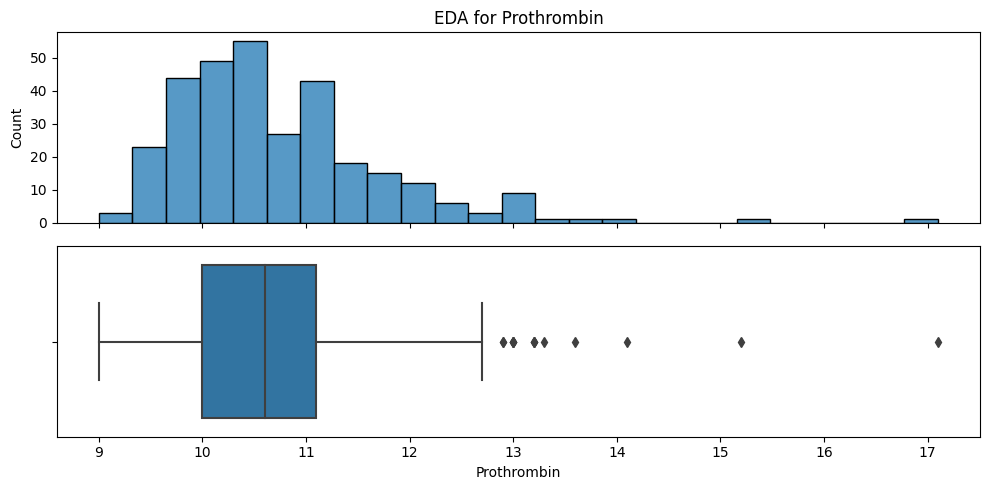

In [ ]:
plot_numeric(df,'Prothrombin')

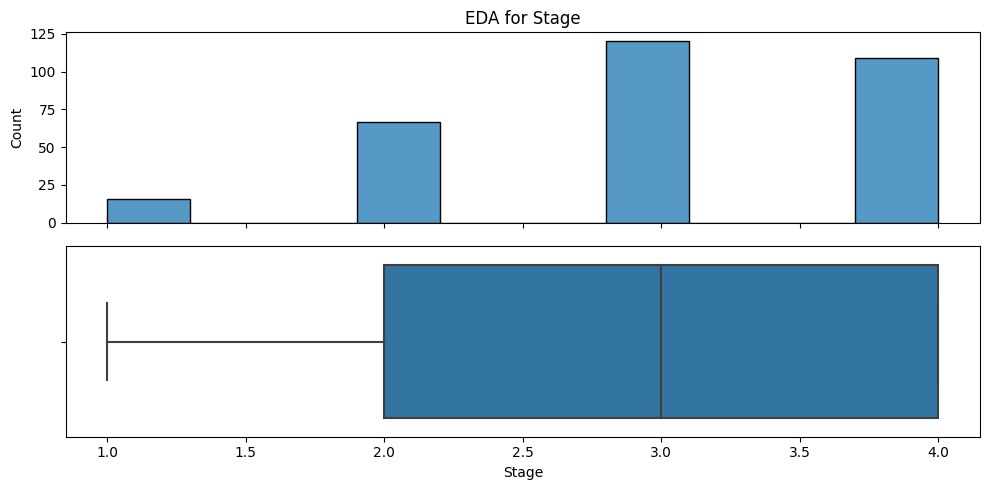

In [ ]:
plot_numeric(df,'Stage')

Cat

<Axes: xlabel='Drug', ylabel='count'>

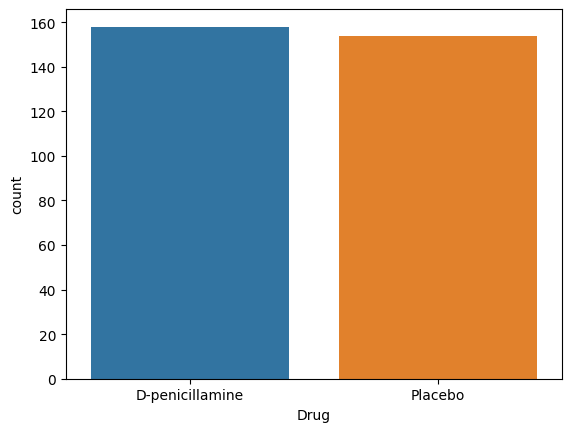

In [ ]:
sns.countplot(data=df, x="Drug")

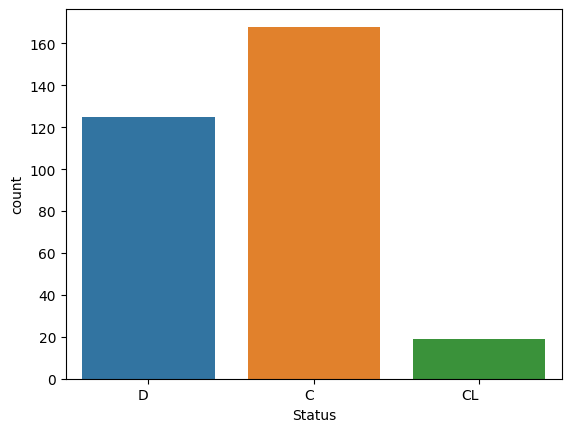

In [ ]:
ax = sns.countplot(data=df, x="Status")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right');

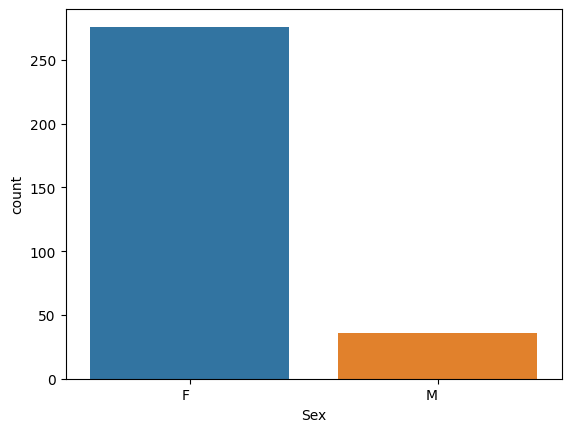

In [ ]:
ax = sns.countplot(data=df, x="Sex")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right');

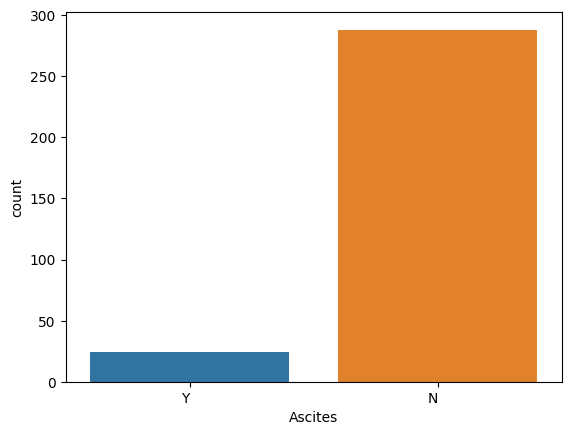

In [ ]:
ax = sns.countplot(data=df, x="Ascites")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right');

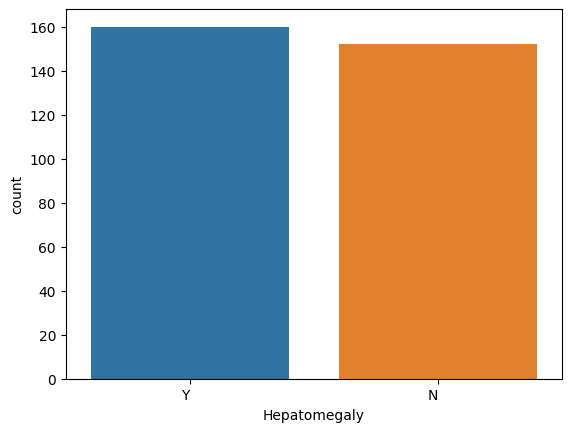

In [ ]:
ax = sns.countplot(data=df, x="Hepatomegaly")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right');

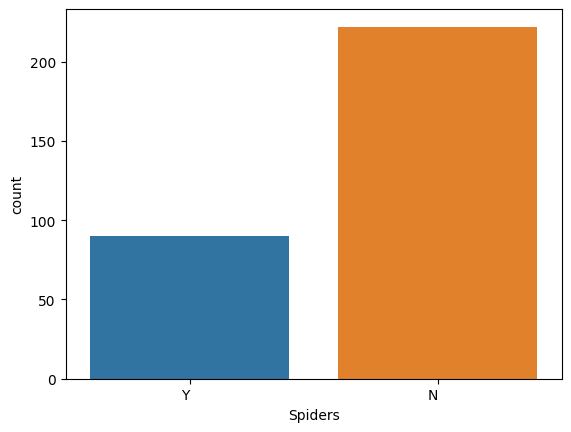

In [ ]:
ax = sns.countplot(data=df, x="Spiders")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right');

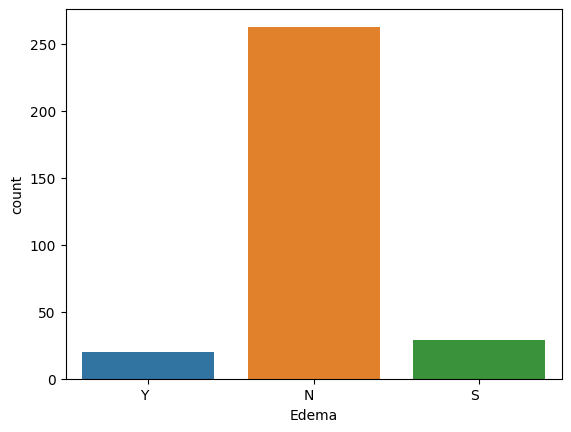

In [ ]:
ax = sns.countplot(data=df, x="Edema")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right');